## Using a combination of quantitative and qualitative variables, the models will predict whether a person has heart disease or not.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("Data\heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.loc[df.isnull().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [7]:
df.loc[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [8]:
df.loc[df.duplicated(keep=False)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


# Some charts to understand the data

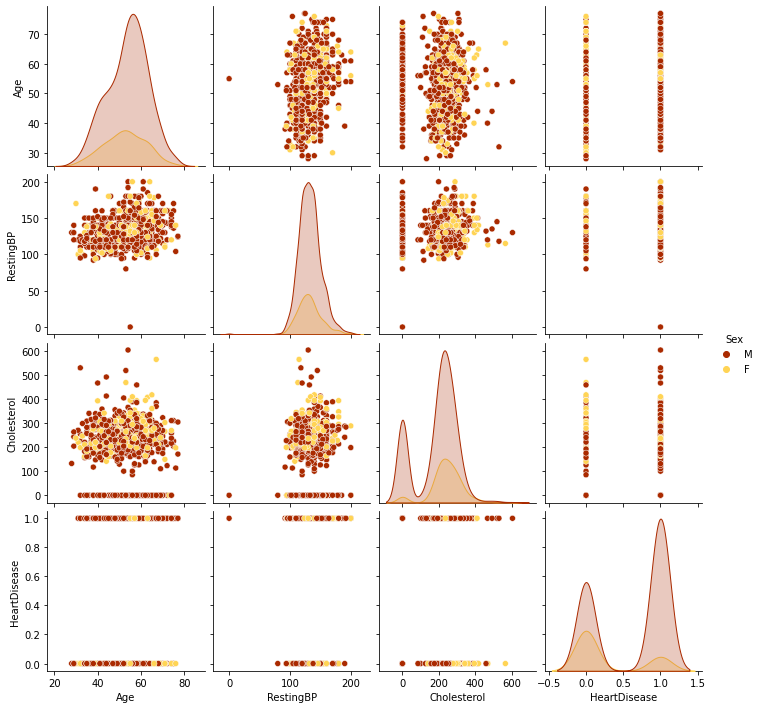

In [21]:
sns.pairplot(data=df, vars=['Age', 'RestingBP', 'Cholesterol', 'HeartDisease'], hue='Sex', palette='afmhot')

In [29]:
group1 = df.groupby('Sex').count()
group1.head()

sex = [group for group, df1 in df.groupby('Sex')]

heart_m = df.loc[df['Sex'] == 'M']
heart_f = df.loc[df['Sex'] == 'F']

# y1 = heart_t.groupby('Sex').count()['Age']
# y2 = heart_f.groupby('Sex').count()['Age']

In [41]:
heart_m = heart_m.loc[df['HeartDisease'] == 1, 'Age'].count()
heart_f = heart_f.loc[df['HeartDisease'] == 1, 'Age'].count()

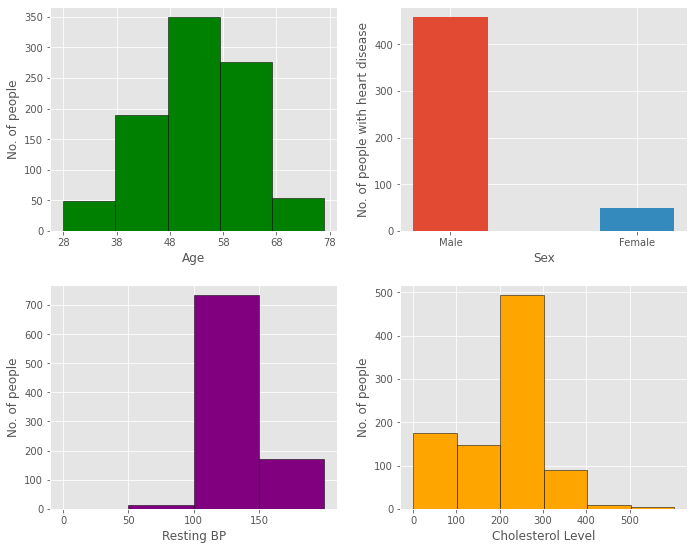

In [66]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax[0,0].hist(df['Age'], bins=5, color='green', edgecolor='k')
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('No. of people')
ax[0,0].set_xticks(np.arange(28, 79, 10))

ax[0,1].bar('Male', heart_m, width=0.4)
ax[0,1].bar('Female', heart_f, width=0.4)
ax[0,1].set_xlabel('Sex')
ax[0,1].set_ylabel('No. of people with heart disease')

ax[1,0].hist(df['RestingBP'], bins=4, color='purple', edgecolor='k')
ax[1,0].set_xlabel('Resting BP')
ax[1,0].set_ylabel('No. of people')
ax[1,0].set_xticks(np.arange(0, 200, 50))

ax[1,1].hist(df['Cholesterol'], bins=6, color='orange', edgecolor='k')
ax[1,1].set_xlabel('Cholesterol Level')
ax[1,1].set_ylabel('No. of people')
ax[1,1].set_xticks(np.arange(0, 600, 100))

plt.tight_layout(pad=2)
plt.show()

In [10]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [11]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

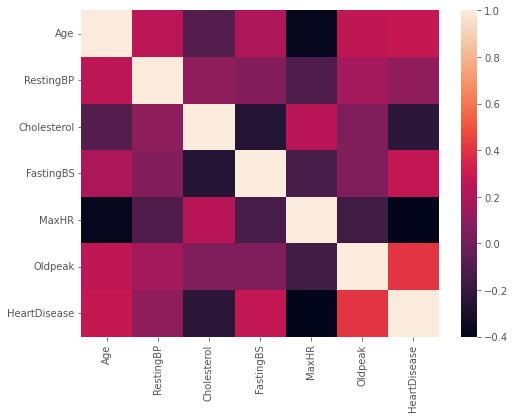

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), ax=ax, vmin=-0.4, vmax=1)

In [13]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [70]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [16]:
from sklearn import preprocessing

ml_df = df.copy()


def labelenc(col):
    encoder = preprocessing.LabelEncoder() 
    ml_df[col] = encoder.fit_transform(ml_df[col])

In [17]:
labelenc('Sex')
labelenc('ChestPainType')
labelenc('RestingECG')
labelenc('ExerciseAngina')
labelenc('ST_Slope')
ml_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [19]:
X = ml_df.drop('HeartDisease', axis=1).values
X_scaled = preprocessing.scale(X)
y = ml_df['HeartDisease'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

In [83]:
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
print(f'RandomForestClassifier Score: {clf1.score(X_test, y_test)}')

RandomForestClassifier Score: 0.8598639455782313


In [22]:
for x,y in zip(X_test, y_test):
    print(f'The forecast value: {clf1.predict([x])} Actual Value: {y}')

The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1


The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1


The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1


The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 1
The forecast value: [0] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1


In [23]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
print(f'DecisionTreeClassifier Score: {clf2.score(X_test, y_test)}')

0.7863945578231293

In [24]:
for x,y in zip(X_test, y_test):
    print(f'The forecast value: {clf2.predict([x])} Actual Value: {y}')

The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 1
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
The forecast value: [1] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [0] Actual Value: 0
The forecast value: [1] Actual Value: 1
